In [1]:
import urllib.request
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score , recall_score , confusion_matrix
from sklearn.preprocessing import LabelEncoder
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import Binarizer
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline
from sklearn.metrics import precision_recall_curve

In [22]:
# 결측값 대체 함수
def fillna(df):
    df['Age'].fillna(df['Age'].mean(), inplace=True)
    df['Cabin'].fillna('N', inplace=True)
    df['Embarked'].fillna('N', inplace=True)
    df['Fare'].fillna(0, inplace=True)
    return df

# 필요없는 피처 제거
def drop_features(df):
    df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
    return df

# 피처를 라벨 인코딩하기
def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

#위의 3가지 함수를 한 번에 적용하는 함수
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

url = 'https://raw.githubusercontent.com/wikibook/pymlrev2/main/1%EC%9E%A5/titanic_train.csv'

titanic_df = pd.read_csv(urllib.request.urlopen(url))
y_titanic_df = titanic_df['Survived']
X_titanic_df= titanic_df.drop('Survived', axis=1)
X_titanic_df = transform_features(X_titanic_df)

X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, \
                                                    test_size=0.20, random_state=11)

lr_clf = LogisticRegression(solver='liblinear')

lr_clf.fit(X_train , y_train)

LogisticRegression(solver='liblinear')

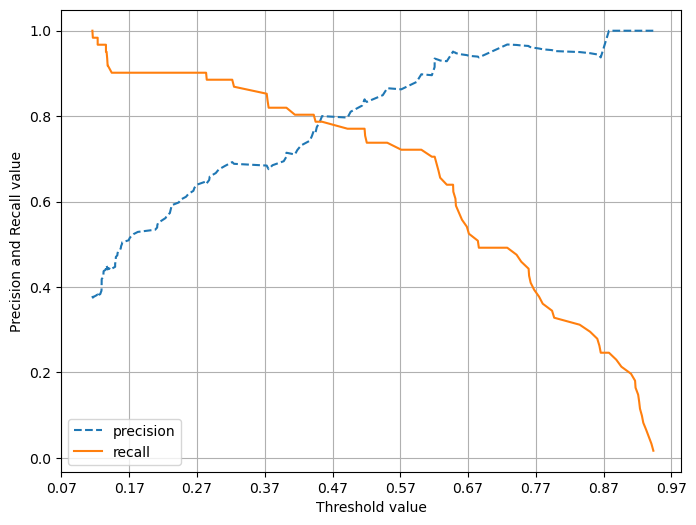

In [23]:
# Precision과 Recall의 Trade-off 관계를 시각화하기 위한 코드

def precision_recall_curve_plot(y_test, pred_proba_c1):
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)
    
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary],label='recall')
    
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend(); plt.grid()
    plt.show()
    
precision_recall_curve_plot(y_test, lr_clf.predict_proba(X_test)[:, 1] )


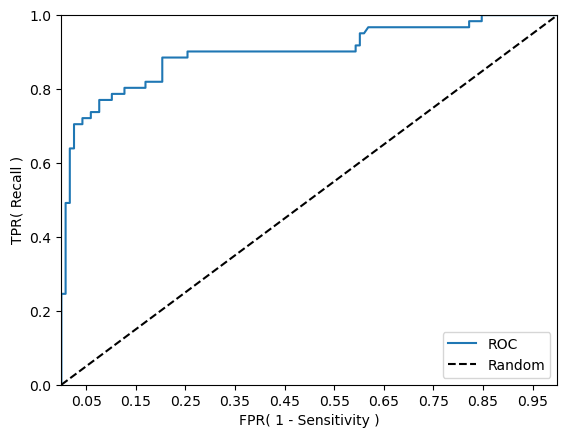

In [24]:
# Roc curve를 시각화하기 위한 코드 

from sklearn.metrics import roc_curve

def roc_curve_plot(y_test, pred_proba_c1):
    fprs, tprs, thresholds = roc_curve(y_test, pred_proba_c1)
    plt.plot(fprs, tprs, label = 'ROC')
    plt.plot([0,1], [0,1], 'k--', label = 'Random')

    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    plt.xlim(0,1)
    plt.ylim(0,1)
    plt.xlabel('FPR( 1 - Sensitivity )')
    plt.ylabel('TPR( Recall )')
    plt.legend()
    plt.show()

roc_curve_plot(y_test, lr_clf.predict_proba(X_test)[:,1])

In [25]:
from sklearn.metrics import roc_auc_score
pred_proba = lr_clf.predict_proba(X_test)[:, 1]
roc_score = roc_auc_score(y_test, pred_proba)
print(f"ROC-AUC 값: {roc_score:.4f}")

ROC-AUC 값: 0.8987


## 유방암 데이터

In [63]:
import pandas as pd
import matplotlib.pyplot as p1t
%matplotlib inline
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [64]:
cancer = load_breast_cancer()
cancer

X = pd.DataFrame(cancer.data, columns=cancer.feature_names)
X.head()

y = pd.DataFrame(cancer.target, columns=['cancer'])
y.head()

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y,test_size=0.3, random_state=0)
y_train = y_train.values.ravel()

In [65]:
from sklearn.metrics import accuracy_score, roc_auc_score

#로지스틱 회귀 모델 객체 생성
lr_clf = LogisticRegression()

# 학습 데이터를 이용해서 모델을 학습
lr_clf.fit(X_train, y_train)

# 분리해놨던 테스트 데이터로 각 데이터 분류를 예측
lr_preds = lr_clf.predict (X_test)

lr_preds

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1])

In [66]:
print( 'accuracy: {:0.3f}'.format(accuracy_score(y_test, lr_preds)))
print( 'roc_auc: {:0.3f}'.format(roc_auc_score(y_test, lr_preds)))

accuracy: 0.977
roc_auc: 0.972


### 다중 분류

In [67]:
import pandas as pd
import numpy as np

fish = pd.read_csv('https://bit.ly/fish_csv_data')
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [68]:
#어떤 종류의 생선이 있는지 출력
print(pd.unique(fish['Species']))

['Bream' 'Roach' 'Whitefish' 'Parkki' 'Perch' 'Pike' 'Smelt']


In [69]:
#입력 데이터로 쓸 열 선택, 새로운 데이터 프레임으로 반환
#to_numpy() 메서드로 numpy 배열로 바꿔 저장
fish_input = fish[['Weight','Length','Diagonal','Height','Width']].to_numpy()

fish_data =  fish[['Weight','Length','Diagonal','Height','Width']]
fish_data

,Weight,Length,Diagonal,Height,Width
0,242.0,25.4,30.0,11.5200,4.0200
1,290.0,26.3,31.2,12.4800,4.3056
2,340.0,26.5,31.1,12.3778,4.6961
3,363.0,29.0,33.5,12.7300,4.4555
4,430.0,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...
154,12.2,12.2,13.4,2.0904,1.3936
155,13.4,12.4,13.5,2.4300,1.2690
156,12.2,13.0,13.8,2.2770,1.2558
157,19.7,14.3,15.2,2.8728,2.0672


In [70]:
#target data 생성
fish_target = fish['Species']

#train set, test set 분리
train_X, test_X, train_y, test_y = train_test_split(fish_data, fish_target, random_state=42)

ss=StandardScaler()
ss.fit(train_X)
train_scaled=ss.transform(train_X)
test_scaled=ss.transform(test_X)

#로지스틱 회귀 모델 객체 생성
lr = LogisticRegression(C=20, max_iter=1000)  
# 학습 데이터를 이용해서 모델을 학습 시킨다
lr.fit(train_scaled, train_y)

LogisticRegression(C=20, max_iter=1000)

In [71]:
# 로지스틱 회귀 모델의 성능 확인 (정확성 precision %를 리턴함)
print(lr.score(train_scaled, train_y))
print(lr.score(test_scaled, test_y))

0.9327731092436975
0.925


In [72]:
#처음 5개 샘플에 대한 예측
print(lr.predict(test_scaled[:5]))

['Perch' 'Smelt' 'Pike' 'Roach' 'Perch']


In [73]:
proba = lr.predict_proba(test_scaled[:5])
print(np.round(proba, decimals=3))

[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]


In [74]:
print(lr.classes_)

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


## SVM

In [38]:
# 시각화를 위한 데이터 읽기와 차원축소 코드(중요X)

!pip install mlxtend
import sklearn.datasets as d
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
from sklearn.decomposition import PCA

x = d.load_breast_cancer()
cancer = pd.DataFrame(data = x.data, columns = x.feature_names)
cancer['target'] = x.target

X = cancer.iloc[:,:-1]
y = cancer.iloc[:,-1]

scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

# 변환된 X로 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.3, random_state = 100)

train_X_reduced = PCA(n_components=2).fit_transform(X_train)
test_X_reduced = PCA(n_components=2).fit_transform(X_test)
X_reduced = PCA(n_components=2).fit_transform(X_scaled)

Defaulting to user installation because normal site-packages is not writeable


In [39]:
def visualize_decision_boundary(reduced_X, Y, model, title='SVM'):
    t = np.array(Y)
    t = t.flatten()
    t = t.astype(np.integer)

    model.fit(reduced_X, t)

    plt.figure(figsize=[15, 10])
    plot_decision_regions(reduced_X,
                          t,
                          clf=model,
                          hide_spines=False,
                          colors='purple,limegreen',
                          markers=['^', 'v'])
    plt.title('{}'.format(title))
    plt.show()

SVM 정확도:  0.9532163742690059


C:\Users\LG\AppData\Local\Temp\ipykernel_17584\844864226.py:4: DeprecationWarning: Converting `np.integer` or `np.signedinteger` to a dtype is deprecated. The current result is `np.dtype(np.int_)` which is not strictly correct. Note that the result depends on the system. To ensure stable results use may want to use `np.int64` or `np.int32`.
  t = t.astype(np.integer)


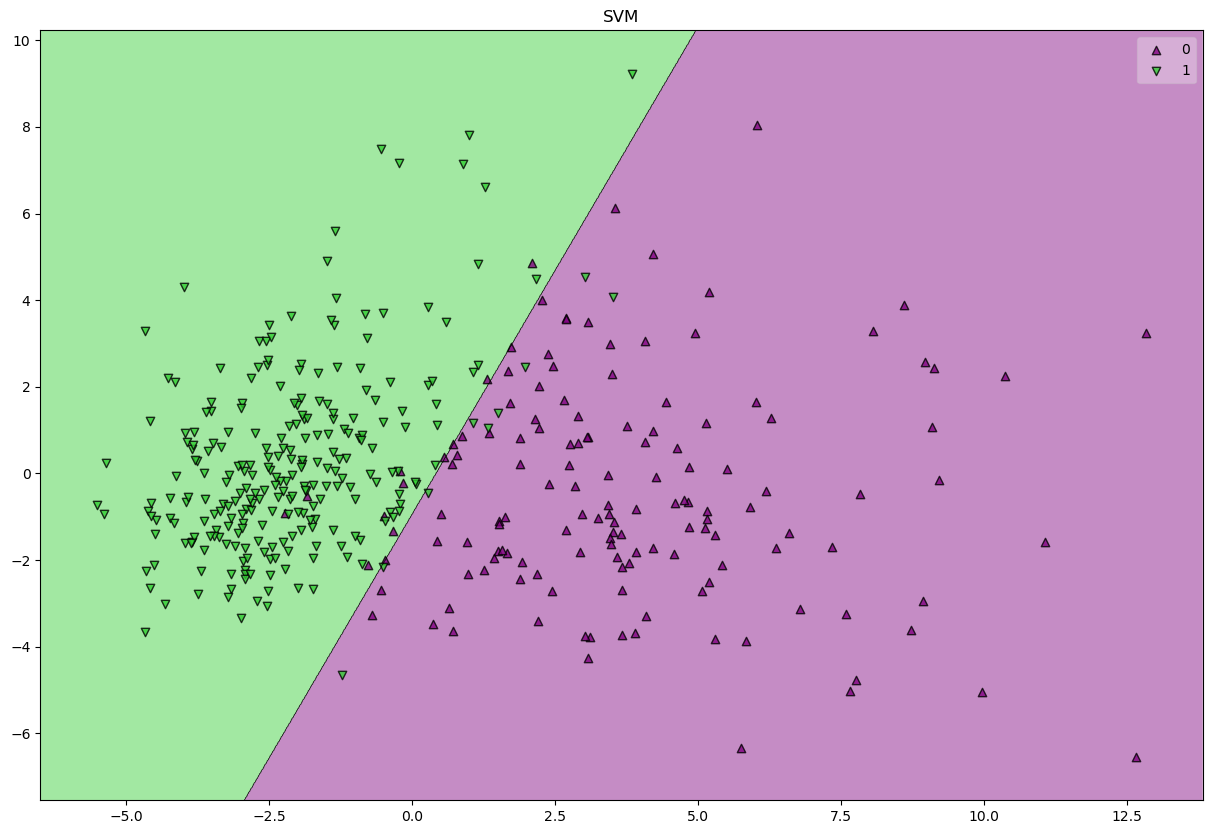

In [40]:
SVM = svm.SVC(kernel='linear')
SVM.fit(X_train, y_train)
prediction = SVM.predict(X_test)
print('SVM 정확도: ', metrics.accuracy_score(prediction, y_test))

visualize_decision_boundary(train_X_reduced, y_train, SVM, 'SVM')

### 이상치 처리

Hard-margin-SVM 정확도:  0.9473684210526315


C:\Users\LG\AppData\Local\Temp\ipykernel_17584\844864226.py:4: DeprecationWarning: Converting `np.integer` or `np.signedinteger` to a dtype is deprecated. The current result is `np.dtype(np.int_)` which is not strictly correct. Note that the result depends on the system. To ensure stable results use may want to use `np.int64` or `np.int32`.
  t = t.astype(np.integer)


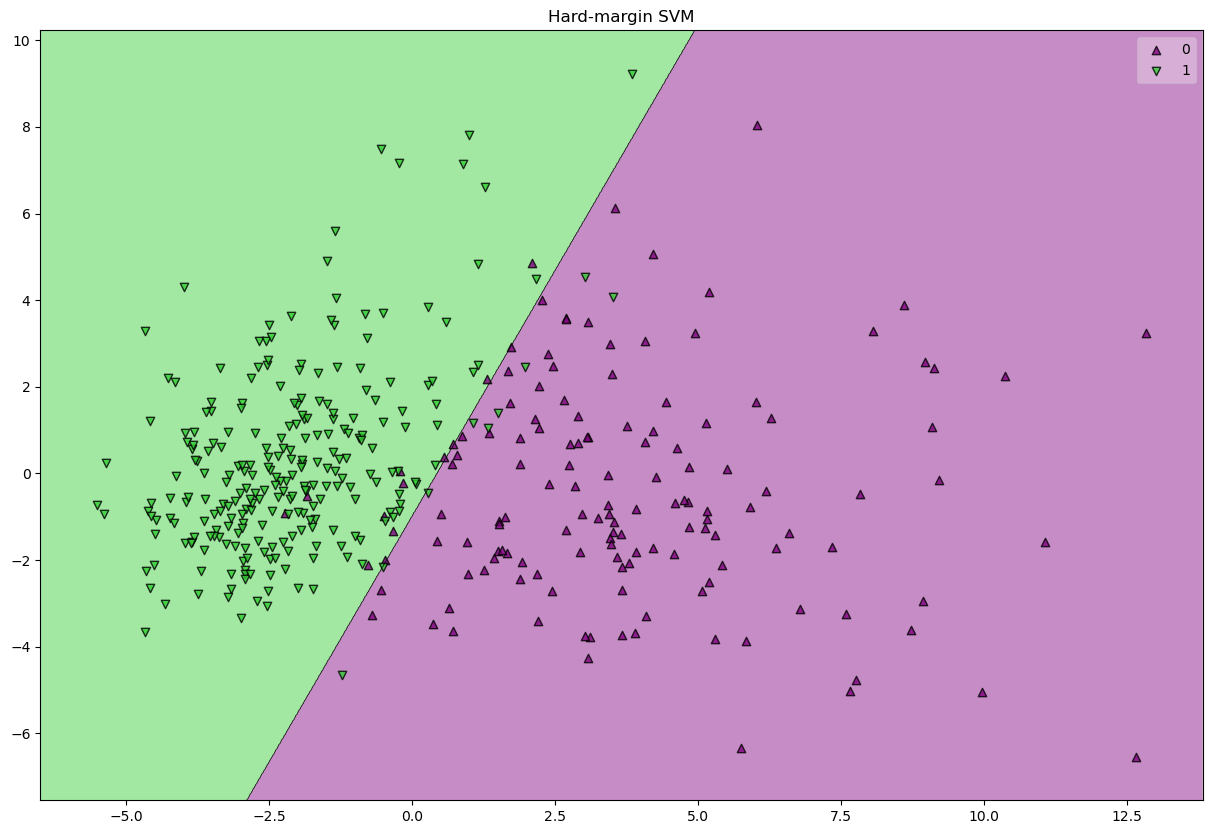

In [41]:
hard_margin_SVM = svm.SVC(kernel='linear', C=9999)
hard_margin_SVM.fit(X_train, y_train)
prediction = hard_margin_SVM.predict(X_test)
print('Hard-margin-SVM 정확도: ', metrics.accuracy_score(prediction, y_test))

visualize_decision_boundary(train_X_reduced, y_train, hard_margin_SVM, 'Hard-margin SVM')

Soft-margin-SVM 정확도:  0.9649122807017544


C:\Users\LG\AppData\Local\Temp\ipykernel_17584\844864226.py:4: DeprecationWarning: Converting `np.integer` or `np.signedinteger` to a dtype is deprecated. The current result is `np.dtype(np.int_)` which is not strictly correct. Note that the result depends on the system. To ensure stable results use may want to use `np.int64` or `np.int32`.
  t = t.astype(np.integer)


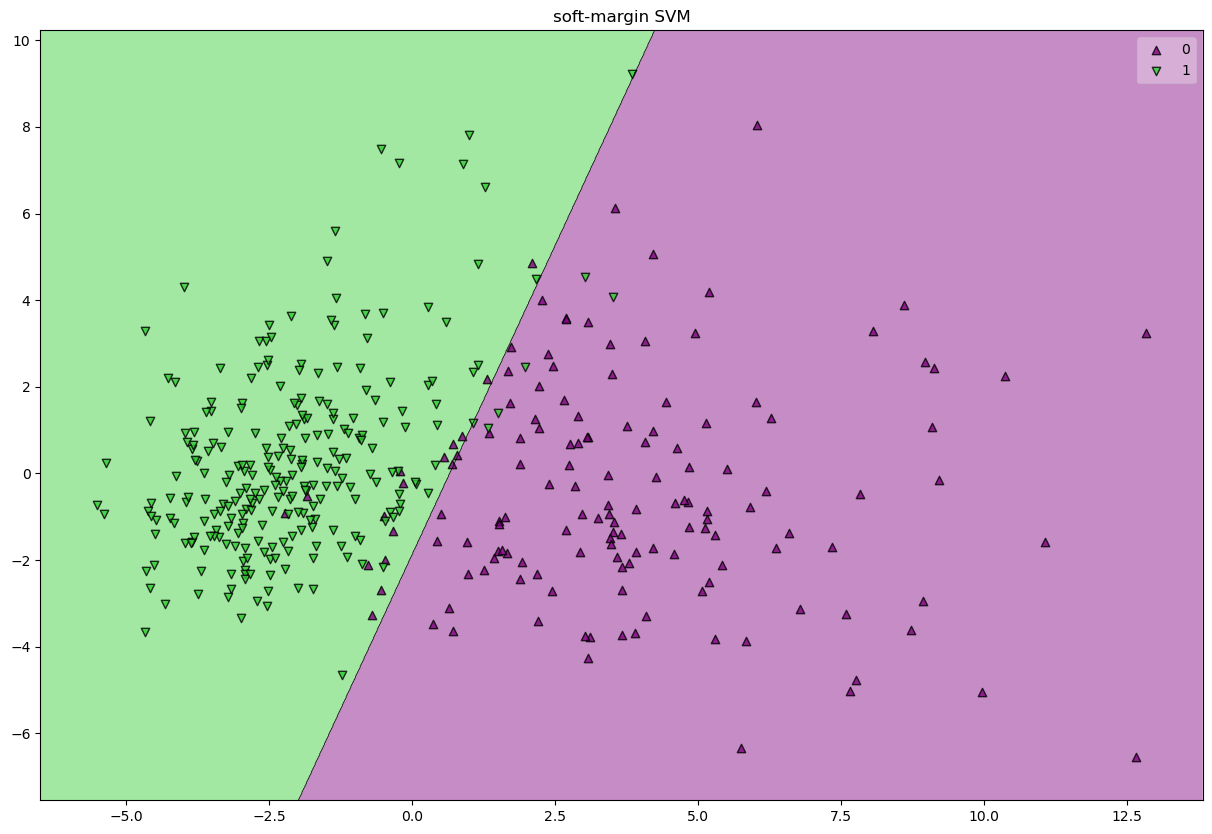

In [42]:
soft_margin_SVM = svm.SVC(kernel='linear', C=0.01)
soft_margin_SVM.fit(X_train, y_train)
prediction = soft_margin_SVM.predict(X_test)
print('Soft-margin-SVM 정확도: ', metrics.accuracy_score(prediction, y_test))

visualize_decision_boundary(train_X_reduced, y_train, soft_margin_SVM, 'soft-margin SVM')

### 비선형 데이터

In [ ]:
rbf_SVM = svm.SVC(kernel='rbf')
rbf_SVM.fit(X_train, y_train)
prediction = rbf_SVM.predict(X_test)
print('rbf SVM 정확도 ', metrics.accuracy_score(prediction, y_test))

visualize_decision_boundary(train_X_reduced, y_train, rbf_SVM, 'rbf SVM')

rbf SVM 정확도  0.9766081871345029


In [ ]:
poly_SVM = svm.SVC(kernel='poly') # poly: 다항함수를 통해 판별
poly_SVM.fit(X_train, y_train)
prediction = poly_SVM.predict(X_test)
print('poly SVM 정확도 ', metrics.accuracy_score(prediction, y_test))

visualize_decision_boundary(train_X_reduced, y_train, poly_SVM, 'poly SVM')

sigmoid SVM 정확도  0.9298245614035088


C:\Users\LG\AppData\Local\Temp\ipykernel_17584\844864226.py:4: DeprecationWarning: Converting `np.integer` or `np.signedinteger` to a dtype is deprecated. The current result is `np.dtype(np.int_)` which is not strictly correct. Note that the result depends on the system. To ensure stable results use may want to use `np.int64` or `np.int32`.
  t = t.astype(np.integer)


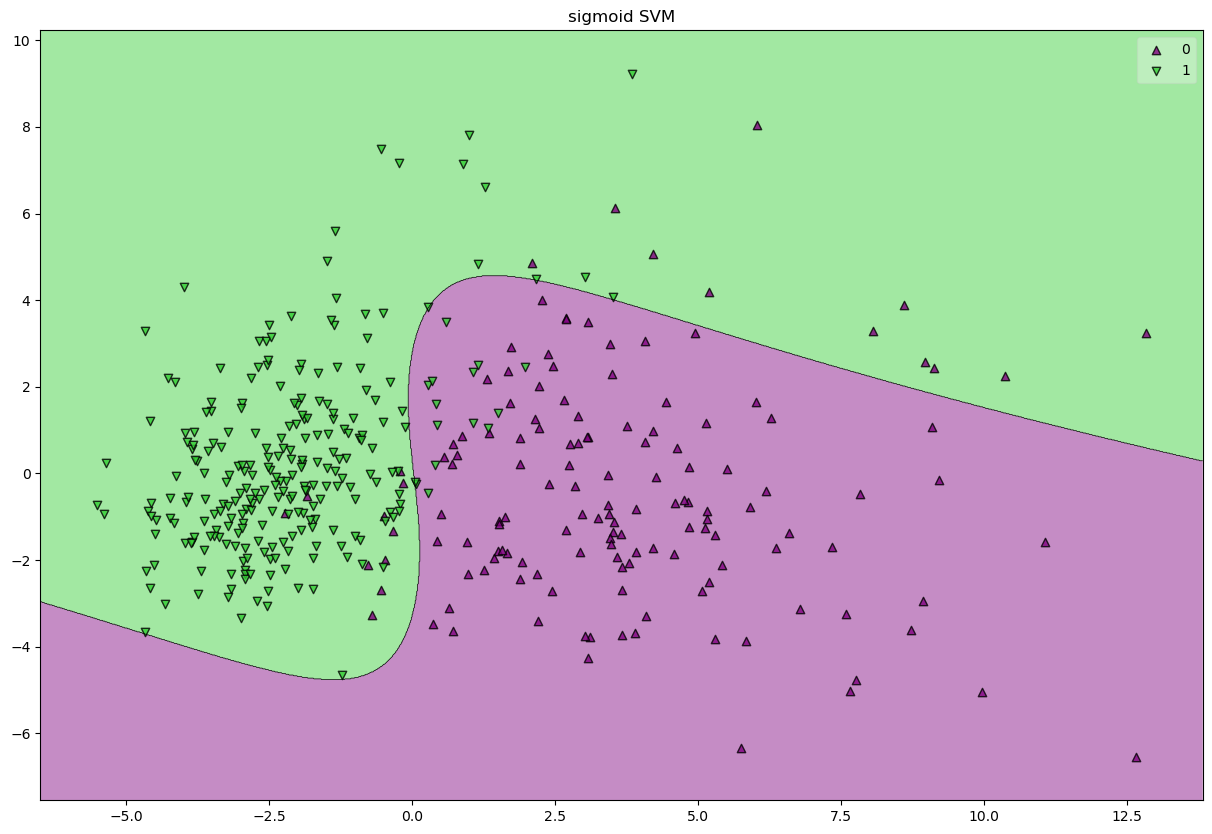

In [45]:
sigmoid_SVM = svm.SVC(kernel='sigmoid') # sigmoid 도 옵션(심화세션?)
sigmoid_SVM.fit(X_train, y_train)
prediction = sigmoid_SVM.predict(X_test)
print('sigmoid SVM 정확도 ', metrics.accuracy_score(prediction, y_test))

visualize_decision_boundary(train_X_reduced, y_train, sigmoid_SVM, 'sigmoid SVM')

## Decision Tree

In [46]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

#DecisionTree Classifier 생성
dt_clf=DecisionTreeClassifier(random_state=156)

#붗꽃 데이터를 로딩하고, 학습과 테스트 데이터 세트로 분리
iris_data=load_iris()
X_train,X_test,y_train,y_test=train_test_split(iris_data.data,iris_data.target,
                                              test_size=0.2,random_state=11)

#DecisionTressClassifer 학습
dt_clf.fit(X_train,y_train)

dt_clf.predict(X_test)

array([2, 2, 1, 1, 2, 0, 1, 0, 0, 1, 1, 1, 1, 2, 2, 0, 2, 1, 2, 2, 1, 0,
       0, 1, 0, 0, 2, 1, 0, 1])

In [47]:
import graphviz
from sklearn.tree import export_graphviz

a=export_graphviz(dt_clf, class_names=iris_data.target_names,
                   feature_names = iris_data.feature_names, impurity=True, filled=True)

test=open("test.txt",'w')
with open("test.txt", "w") as file:
    file.write(a)
test.close()

# 위에서 생성된 tree.dot 파일을 Graphviz가 읽어서 주피터 노트북상에서 시각화

with open("test.txt") as f:
    dot_graph=f.read()
graphviz.Source(dot_graph)

ModuleNotFoundError: No module named 'graphviz'

## KNN

In [49]:
# 35마리의 도미 데이터
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]

# 14마리의 빙어 데이터
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

length= bream_length + smelt_length
weight= bream_weight + smelt_weight

fish_data = [[l, w] for l, w in zip(length, weight)]

fish_target = [1]*35 + [0]*14 # Y데이터 
print(fish_target)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


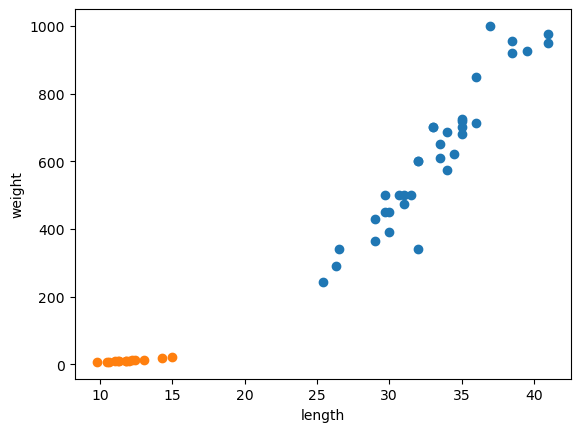

In [50]:
plt.scatter(bream_length, bream_weight)
plt.scatter(smelt_length, smelt_weight)
plt.xlabel("length")
plt.ylabel('weight')
plt.show()

In [53]:
from sklearn.neighbors import KNeighborsClassifier #KNN 분류 

kn=KNeighborsClassifier() #머신 on 

kn.fit(fish_data, fish_target) #물고기 데이터들을 X,Y에 넣어서 머신을 학습시켜서 규칙을 찾게 한다. 

KNeighborsClassifier()

In [54]:
kn.score(fish_data, fish_target) # 정확도 측정. 즉 모델이 정확도가 100퍼센트라 도미와 빙어를 완벽하게 분류 가능해졌다.

1.0

In [55]:
kn.predict([[30,600]])

array([1])

## 앙상블

In [56]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
wine = pd.read_csv("https://bit.ly/wine_csv_data")
data= wine[['alcohol','sugar','pH']].to_numpy()
target = wine['class'].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state= 42)

In [57]:
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_jobs=-1, random_state=42)

In [58]:
scores = cross_validate(rf, X_train, y_train, return_train_score= True, n_jobs=-1)
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9973541965122431 0.8905151032797809


In [59]:
rf.fit(X_train, y_train)
print(rf.feature_importances_) 

[0.23167441 0.50039841 0.26792718]


In [60]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate
gb= GradientBoostingClassifier(random_state=42)
scores= cross_validate(gb, X_train, y_train, return_train_score = True, n_jobs=-1)
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.8881086892152563 0.8720430147331015


In [61]:
gb.fit(X_train, y_train)
print(gb.feature_importances_)

[0.11949946 0.74871836 0.13178218]
